**Aim: Write a program for object detection from the image/video.**

In [ ]:
import torch
import torchvision
import pycocotools
from PIL import Image

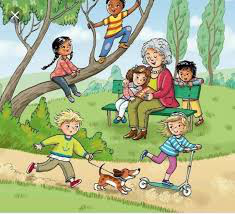

In [ ]:
holiday = Image.open("kids.jpg").convert('RGB')
holiday

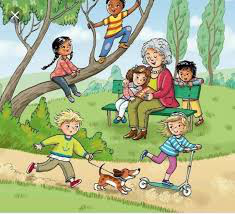

In [ ]:
kids_playing = Image.open("kids.jpg").convert('RGB')
kids_playing

In [ ]:
holiday_tensor_int = pil_to_tensor(holiday)
kids_playing_tensor_int = pil_to_tensor(kids_playing)
holiday_tensor_int.shape
kids_playing_tensor_int.shape

NameError: ignored

In [ ]:
holiday_tensor_int = holiday_tensor_int.unsqueeze(dim=0)
kids_playing_tensor_int = kids_playing_tensor_int.unsqueeze(dim=0)
holiday_tensor_int.shape, kids_playing_tensor_int.shape

NameError: ignored

In [ ]:
print(holiday_tensor_int.min(), holiday_tensor_int.max())

In [ ]:
holiday_tensor_float = holiday_tensor_int / 255.0
kids_playing_tensor_float = kids_playing_tensor_int / 255.0
print(holiday_tensor_float.min(), holiday_tensor_float.max())

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
object_detection_model = fasterrcnn_resnet50_fpn(pretrained=True, progress=False)
object_detection_model.eval(); ## Setting Model for Evaluation/Prediction
holiday_preds = object_detection_model(holiday_tensor_float)
holiday_preds

In [ ]:
holiday_preds[0]["boxes"] = holiday_preds[0]["boxes"][holiday_preds[0]["scores"] > 0.8]
holiday_preds[0]["labels"] = holiday_preds[0]["labels"][holiday_preds[0]["scores"] > 0.8]
holiday_preds[0]["scores"] = holiday_preds[0]["scores"][holiday_preds[0]["scores"] > 0.8]
holiday_preds

In [ ]:
kids_preds = object_detection_model(kids_playing_tensor_float)
kids_preds

In [ ]:
kids_preds[0]["boxes"] = kids_preds[0]["boxes"][kids_preds[0]["scores"] > 0.8]
kids_preds[0]["labels"] = kids_preds[0]["labels"][kids_preds[0]["scores"] > 0.8]
kids_preds[0]["scores"] = kids_preds[0]["scores"][kids_preds[0]["scores"] > 0.8]
kids_preds

In [ ]:
from pycocotools.coco import COCO
annFile='/content/instances_val2017.json'
coco=COCO(annFile)

In [ ]:
holiday_labels = coco.loadCats(holiday_preds[0]["labels"].numpy())
holiday_labels

In [ ]:
kids_labels = coco.loadCats(kids_preds[0]["labels"].numpy())
kids_labels

In [ ]:
from torchvision.utils import draw_bounding_boxes
holiday_annot_labels = ["{}-{:.2f}".format(label["name"], prob) for label, prob in zip(holiday_labels, holiday_preds[0]["scores"].detach().numpy())]
holiday_output = draw_bounding_boxes(image=holiday_tensor_int[0], 
                                     boxes=holiday_preds[0]["boxes"],
                                     labels=holiday_annot_labels,
                                     colors=["red" if label["name"]=="person" else "green" for label in holiday_labels],
                                     width=2
)
holiday_output.shape